In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit/credit.csv


In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("/kaggle/input/credit/credit.csv")
df.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [4]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [5]:
df.shape

(100000, 28)

In [6]:
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [7]:
df.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                         float64
SSN                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [8]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [9]:

# Check unique values for categorical columns
categorical_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in Occupation:
Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

Unique values in Credit_Mix:
Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

Unique values in Payment_of_Min_Amount:
Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

Unique values in Payment_Behaviour:
Payment_Behaviour
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: count, dtype: int64

Unique values in Cre

In [10]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


In [11]:
# Drop irrelevant columns
columns_to_drop = ['ID', 'Customer_ID', 'Name', 'SSN']
df = df.drop(columns=columns_to_drop)

# Confirm changes
print(f"Columns after dropping irrelevant ones: {df.columns.tolist()}")


Columns after dropping irrelevant ones: ['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


In [12]:

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Series([], dtype: int64)


In [13]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, cols):
    outliers = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_indices = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))].index
        if len(outlier_indices) > 0:
            outliers[col] = len(outlier_indices)
    return outliers

# List of numerical columns to check for outliers
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Detect outliers
outliers = detect_outliers_iqr(df, numerical_cols)
print("Outliers detected in each column:")
print(outliers)


Outliers detected in each column:
{'Annual_Income': 2000, 'Monthly_Inhand_Salary': 2017, 'Delay_from_due_date': 4002, 'Changed_Credit_Limit': 579, 'Num_Credit_Inquiries': 787, 'Outstanding_Debt': 5272, 'Credit_Utilization_Ratio': 4, 'Total_EMI_per_month': 5044, 'Amount_invested_monthly': 4464, 'Monthly_Balance': 7400}


In [14]:
# Function to remove outliers
def remove_outliers_iqr(df, cols):
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        df_clean = df_clean[~((df_clean[col] < (Q1 - 1.5 * IQR)) | (df_clean[col] > (Q3 + 1.5 * IQR)))]
    return df_clean

# Remove outliers from the dataset
df_clean = remove_outliers_iqr(df, numerical_cols)
print(f"Dataset shape before removing outliers: {df.shape}")
print(f"Dataset shape after removing outliers: {df_clean.shape}")

Dataset shape before removing outliers: (100000, 24)
Dataset shape after removing outliers: (72961, 24)


In [15]:
# Re-run descriptive statistics
print(df_clean.describe())

# Check unique values for categorical columns again
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df_clean[col].value_counts())


              Month           Age  Annual_Income  Monthly_Inhand_Salary  \
count  72961.000000  72961.000000   72961.000000           72961.000000   
mean       4.470183     33.539233   39915.190949            3323.045581   
std        2.290975     10.836784   27030.035061            2255.369618   
min        1.000000     14.000000    7005.930000             332.128333   
25%        2.000000     25.000000   18503.850000            1553.835000   
50%        4.000000     33.000000   32701.560000            2723.624167   
75%        6.000000     42.000000   57107.120000            4715.032500   
max        8.000000     56.000000  145932.040000           12034.433333   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate   Num_of_Loan  \
count       72961.000000     72961.000000   72961.000000  72961.000000   
mean            5.213525         5.368169      13.836557      3.257699   
std             2.499947         1.978150       8.335400      2.206961   
min             0.000000    

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

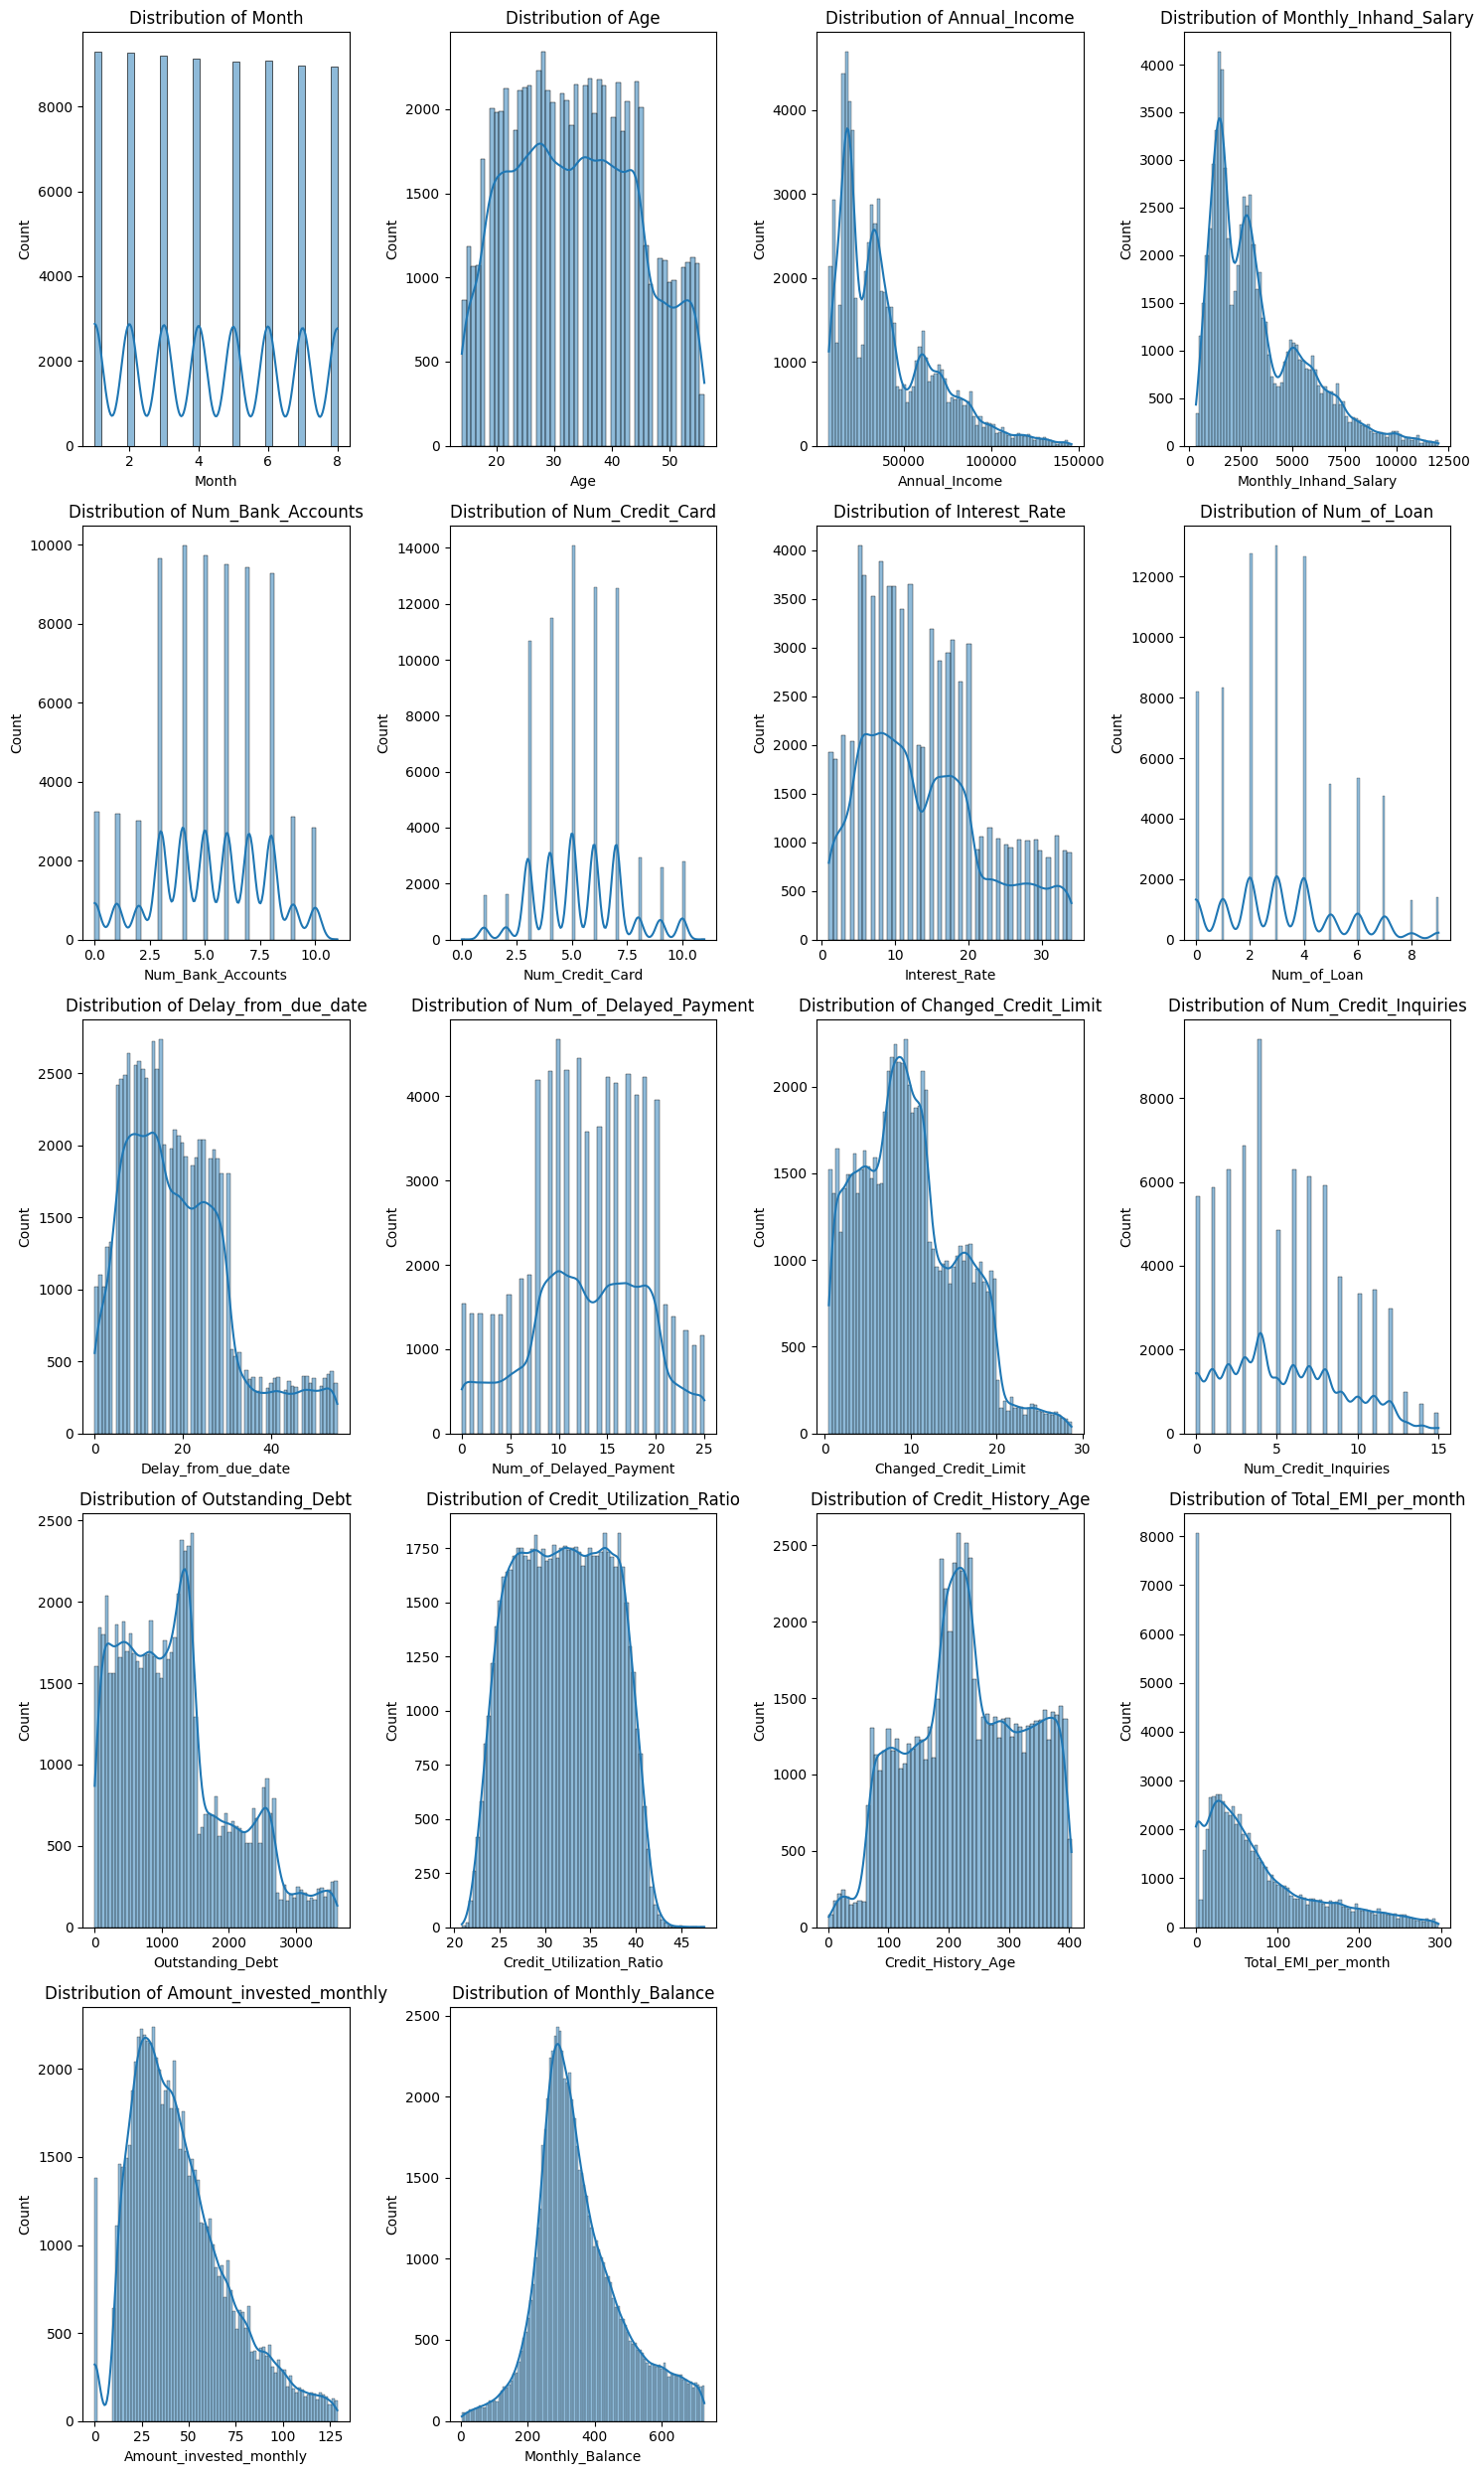

In [17]:
# Distribution of numerical features
num_numerical_cols = len(numerical_cols)
n_cols = 4
n_rows = (num_numerical_cols // n_cols) + (num_numerical_cols % n_cols > 0)

plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



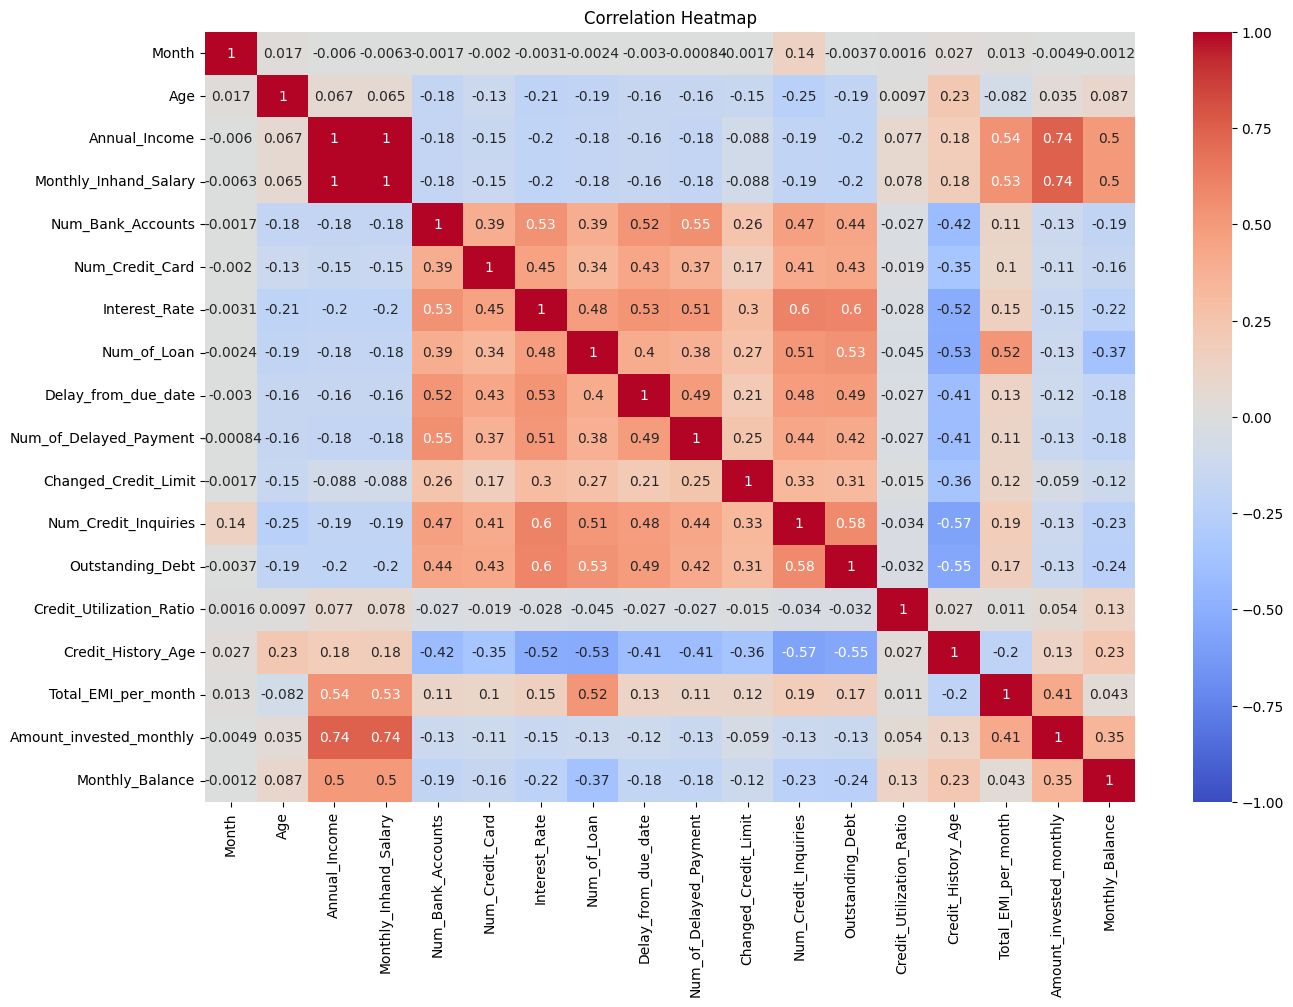

In [18]:

# Correlation heatmap
numerical_df = df_clean.select_dtypes(include=[np.number])
corr = numerical_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

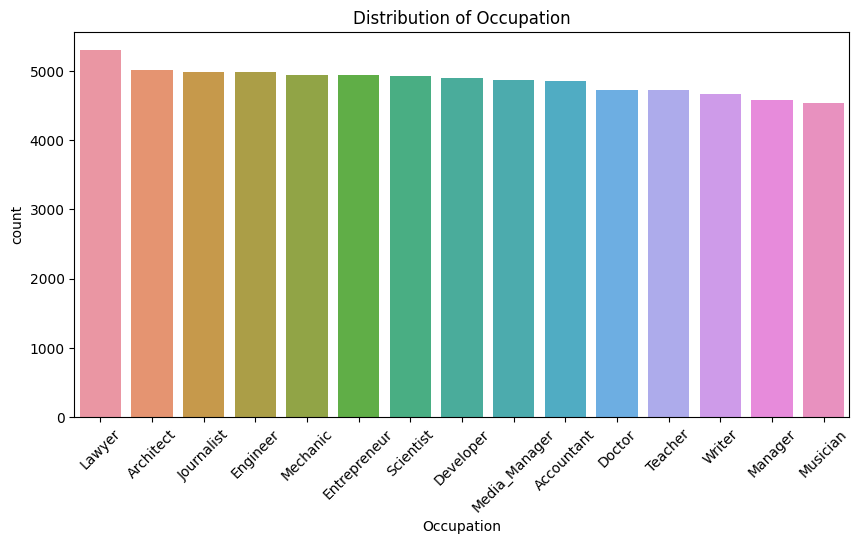

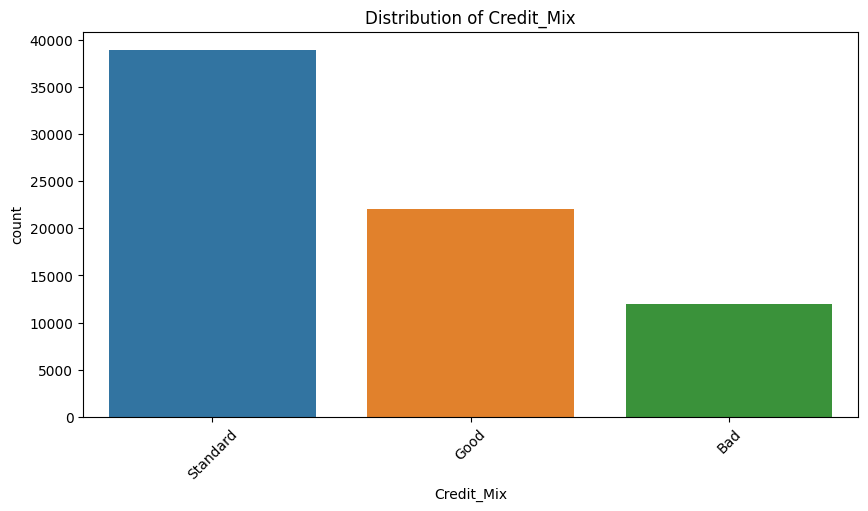

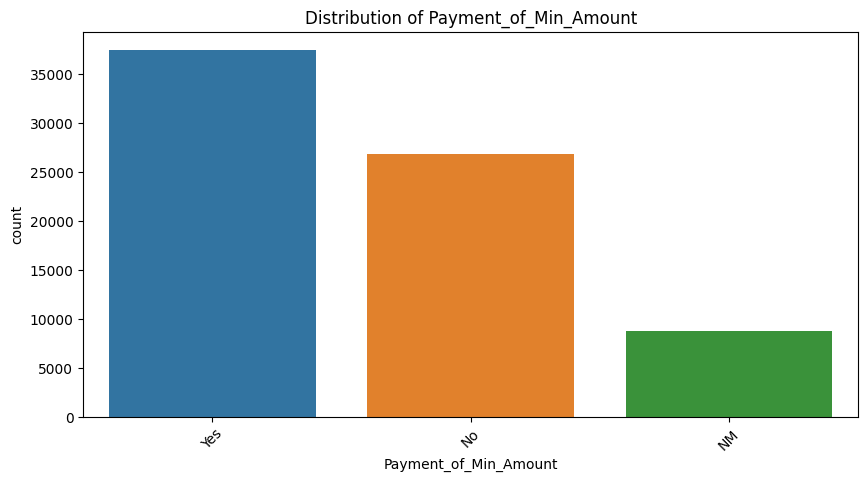

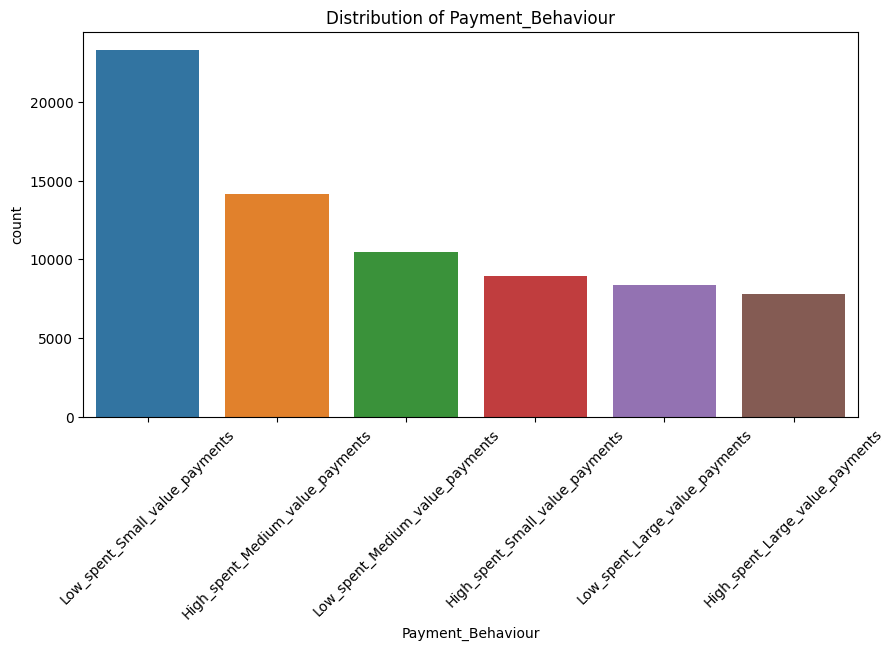

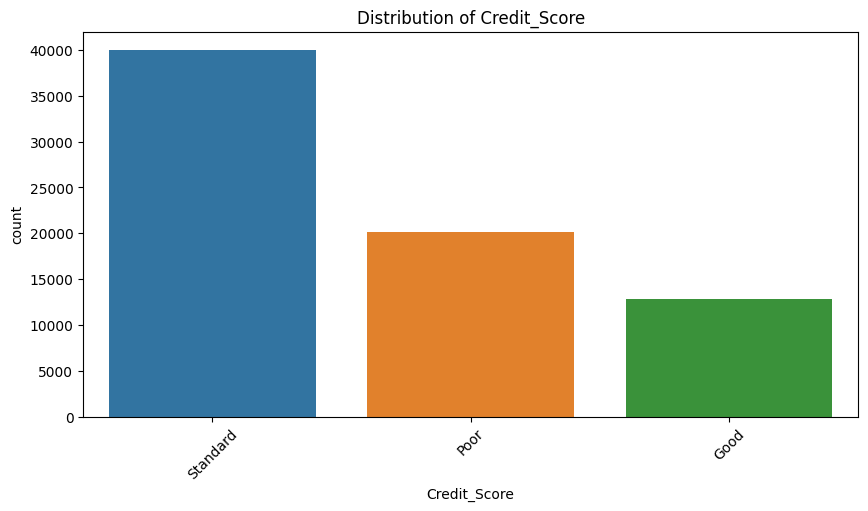

In [19]:

# Distribution of categorical features
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_clean, x=col, order=df_clean[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


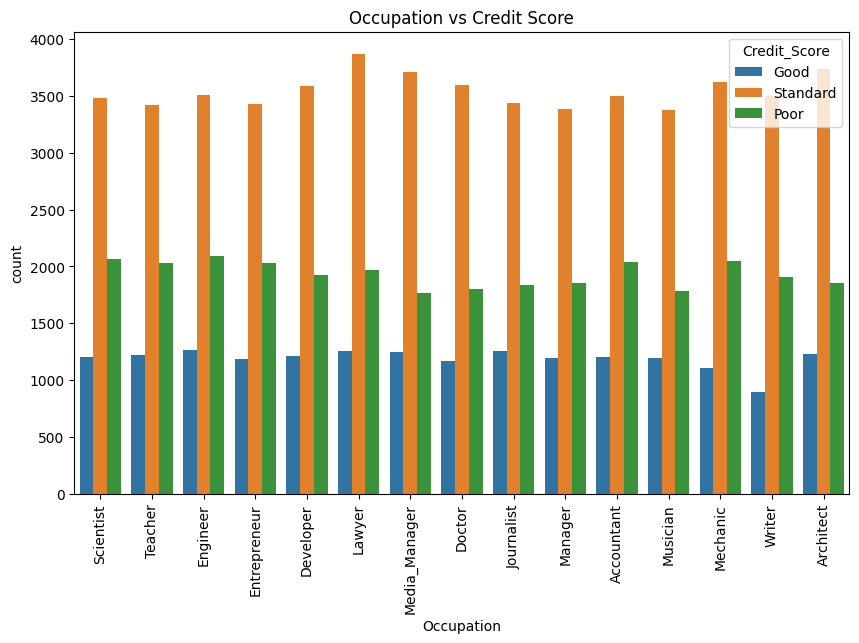

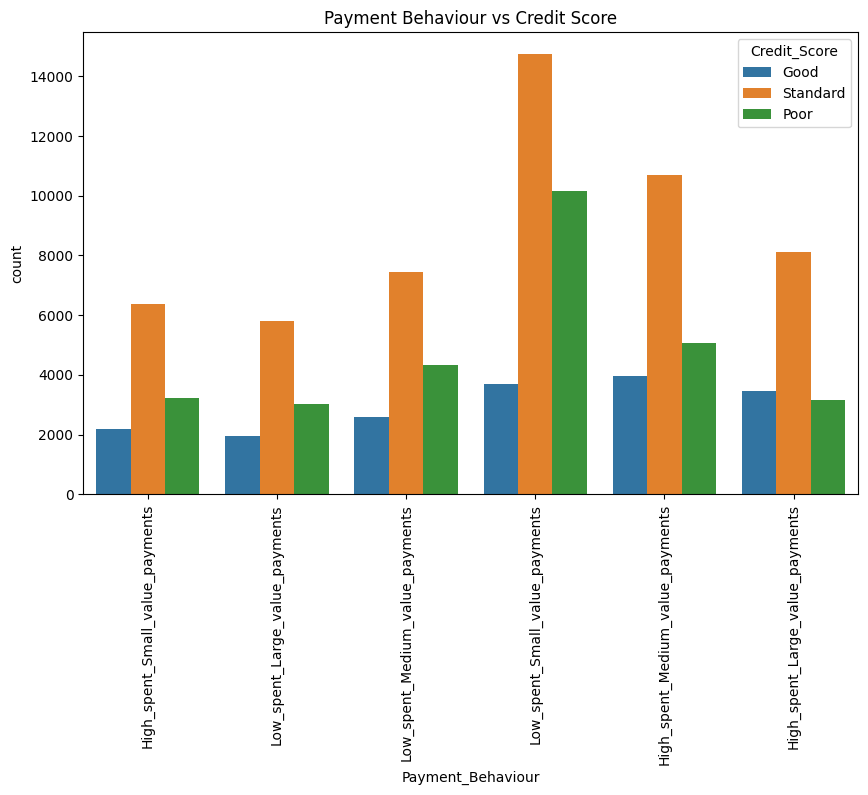

In [20]:
# Plot bar charts to show the relationship between categorical variables and Credit Score
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Occupation', hue='Credit_Score')
plt.title('Occupation vs Credit Score')
plt.xticks(rotation=90)
plt.show()

# Payment Behavior vs Credit Score
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Payment_Behaviour', hue='Credit_Score')
plt.title('Payment Behaviour vs Credit Score')
plt.xticks(rotation=90)
plt.show()


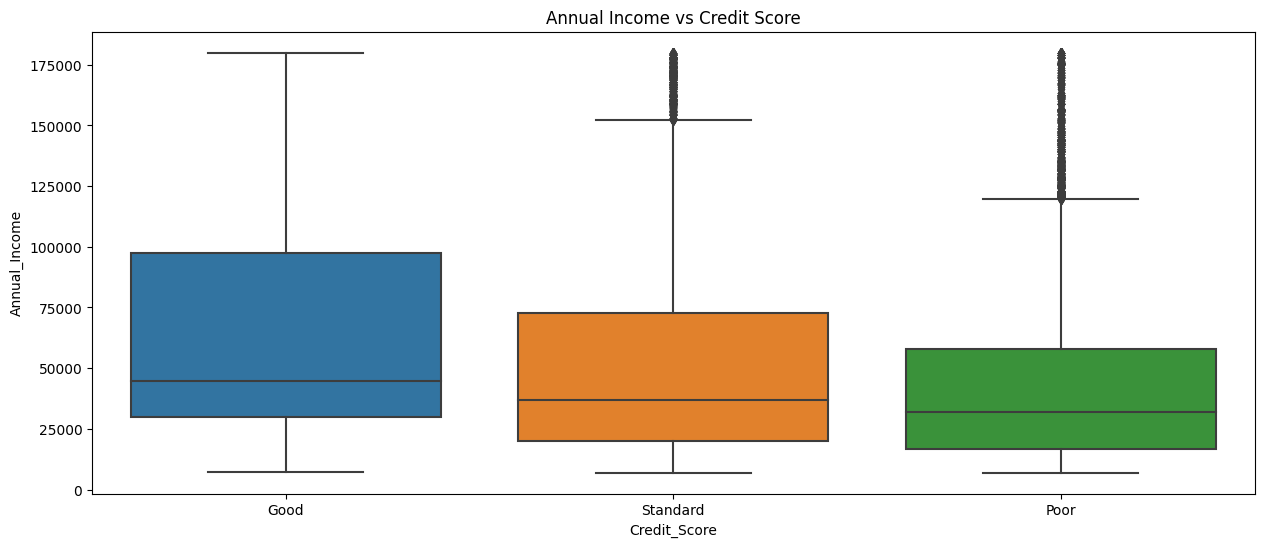

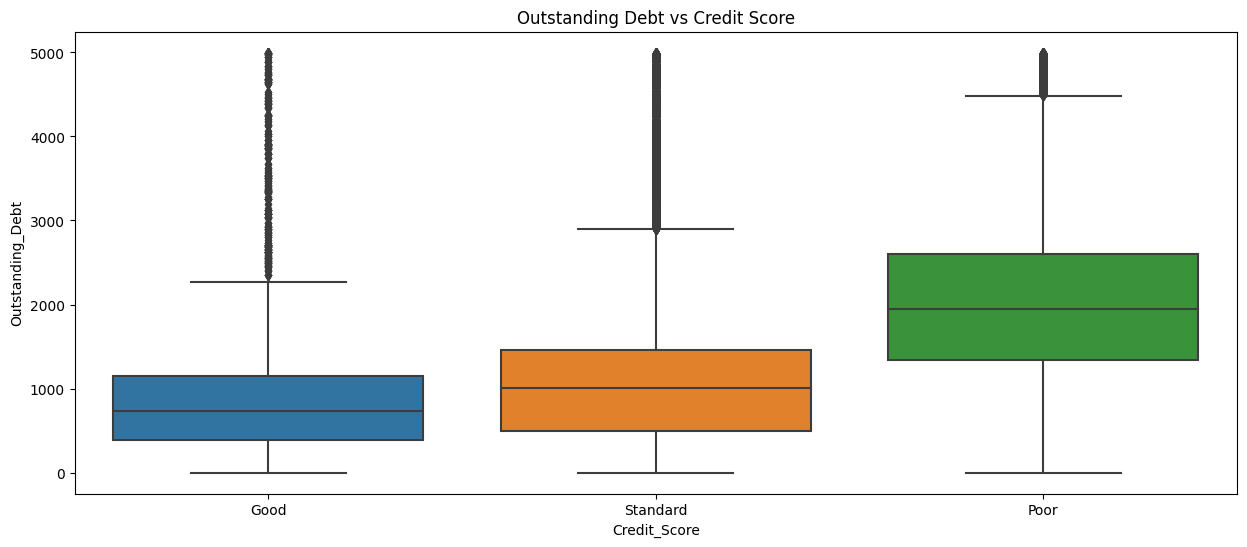

In [21]:
# Boxplot to compare numerical features across Credit Score categories
plt.figure(figsize=(15, 6))
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df)
plt.title('Annual Income vs Credit Score')
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=df)
plt.title('Outstanding Debt vs Credit Score')
plt.show()


In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label encoding for binary or ordinal categories
le = LabelEncoder()
df['Credit_Score'] = le.fit_transform(df['Credit_Score'])

# One-Hot Encoding for other categorical variables
df = pd.get_dummies(df, columns=['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'])


In [23]:
# Standardize numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
                   'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
                   'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
                   'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
                   'Amount_invested_monthly', 'Monthly_Balance']
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_clean, columns=['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
                                               'Payment_Behaviour'])


In [24]:
# Define features and target again
X = df_encoded.drop(columns='Credit_Score')
y = df_encoded['Credit_Score']

# Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (46694, 46)
Validation set shape: (11674, 46)
Testing set shape: (14593, 46)


In [25]:
df_clean['Age_Income_Interaction'] = df_clean['Age'] * df_clean['Annual_Income']


In [26]:
df_clean['Age_Binned'] = pd.cut(df_clean['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['0-30', '31-40', '41-50', '51-60', '60+'])


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'Annual_Income', 'Outstanding_Debt', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
                       'Amount_invested_monthly', 'Monthly_Balance']

df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])


In [28]:
df_encoded = pd.get_dummies(df_clean, columns=['Age_Binned', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'])


In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_clean['Credit_Score'] = le.fit_transform(df_clean['Credit_Score'])


In [30]:
numeric_df = df_clean.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()


In [31]:
print(df_clean.dtypes)  # Check data types of columns


Month                          int64
Age                          float64
Occupation                    object
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts            float64
Num_Credit_Card              float64
Interest_Rate                float64
Num_of_Loan                  float64
Type_of_Loan                  object
Delay_from_due_date          float64
Num_of_Delayed_Payment       float64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                    object
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Credit_History_Age           float64
Payment_of_Min_Amount         object
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour             object
Monthly_Balance              float64
Credit_Score                   int64
Age_Income_Interaction       float64
Age_Binned                  category
dtype: object


In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding for ordinal categories
ordinal_cols = ['Payment_of_Min_Amount']
le = LabelEncoder()
for col in ordinal_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

# One-Hot Encoding for other categorical variables
df_clean = pd.get_dummies(df_clean, columns=['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_Behaviour'])


In [33]:
df_clean = pd.get_dummies(df_clean, columns=['Age_Binned'])


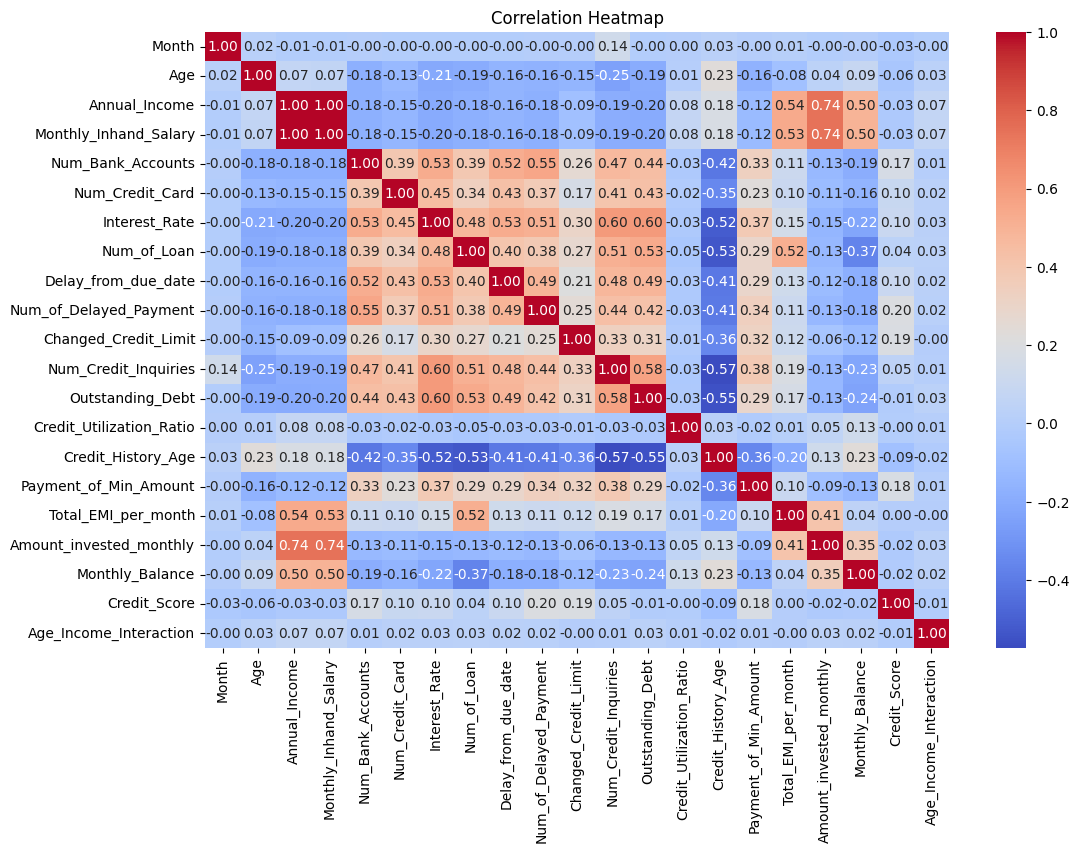

In [34]:
numeric_df = df_clean.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [35]:
# Check dimensions
print(f"Number of columns: {df_clean.shape[1]}")
print(f"Number of rows: {df_clean.shape[0]}")


Number of columns: 4704
Number of rows: 72961


In [36]:
# Check column names
print(df_clean.columns)  # Print the first 10 column names


Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment',
       ...
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments', 'Age_Binned_0-30',
       'Age_Binned_31-40', 'Age_Binned_41-50', 'Age_Binned_51-60',
       'Age_Binned_60+'],
      dtype='object', length=4704)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [38]:
# Define features and target again
X = df_clean.drop(columns='Credit_Score')
y = df_clean['Credit_Score']

# Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (46694, 4703)
Validation set shape: (11674, 4703)
Testing set shape: (14593, 4703)


In [39]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


In [40]:
# Train and evaluate each model
results = {}

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on validation set
    y_pred = model.predict(X_val)

    # Evaluate performance
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, target_names=['Good', 'Standard', 'Poor'])
    conf_matrix = confusion_matrix(y_val, y_pred)

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': conf_matrix
    }

    # Print results
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.7534692479013192
Classification Report:
              precision    recall  f1-score   support

        Good       0.63      0.70      0.67      2079
    Standard       0.76      0.71      0.73      3154
        Poor       0.80      0.79      0.79      6441

    accuracy                           0.75     11674
   macro avg       0.73      0.73      0.73     11674
weighted avg       0.76      0.75      0.75     11674

Confusion Matrix:
[[1465   42  572]
 [ 185 2229  740]
 [ 675  664 5102]]

Model: Decision Tree
Accuracy: 0.7631488778482097
Classification Report:
              precision    recall  f1-score   support

        Good       0.70      0.69      0.70      2079
    Standard       0.74      0.74      0.74      3154
        Poor       0.79      0.80      0.80      6441

    accuracy                           0.76     11674
   macro avg       0.74      0.74      0.74     11674
weighted avg       0.76      0.76      0.76     11674

Confusion Ma

In [41]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for RandomForest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_rf.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters for Random Forest: {grid_rf.best_params_}")
print(f"Best Cross-Validation Score for Random Forest: {grid_rf.best_score_}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 4.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 6.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.8min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.8min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.8min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 3.6min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time= 5.4min


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 4.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 3.9min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 6.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 3.6min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 3.7min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time= 5.4min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estim

In [42]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for the best RandomForest model
cv_scores_rf = cross_val_score(grid_rf.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')

# Average cross-validation score
print(f"Cross-validation scores: {cv_scores_rf}")
print(f"Mean cross-validation score: {cv_scores_rf.mean()}")


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time= 1.6min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time= 1.6min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  54.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time= 1.4min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  28.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  28.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  55.9s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time= 1.4min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  28.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total